In [1]:
from keras.preprocessing.image import ImageDataGenerator
import keras
import os, shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# !mkdir Train
# !mkdir Test

# !mkdir Train\Fake
# !mkdir Train\Real

# !mkdir Test\Fake
# !mkdir Test\Real

In [3]:

PATH = "sign_data_ver1/train/"
FAKE_PATH = "Train/Fake/"
REAL_PATH = "Train/Real/"

for i in os.listdir(PATH):
    control = i.split("_")
    
    try:
        if control[1]=="forg":
            shutil.copytree(PATH+i, FAKE_PATH, dirs_exist_ok=True)
            # os.system("cp -r {} Train/Fake".format(PATH+i))
            
    except:
        shutil.copytree(PATH+i, REAL_PATH, dirs_exist_ok=True)  
        # os.system("cp -r {} Train/Real".format(PATH+i))
        

In [5]:
PATH = "sign_data_ver1/test/"
FAKE_PATH = "Test/Fake/"
REAL_PATH = "Test/Real/"

for i in os.listdir(PATH):
    
    contol = i.split("_")
    
    try:
    
        if contol[1]=="forg":
            shutil.copytree(PATH+i, FAKE_PATH, dirs_exist_ok=True)
            # os.system("copy -r {} Test\Fake".format(PATH+i))
            
    except:
        shutil.copytree(PATH+i, REAL_PATH, dirs_exist_ok=True) 
        # os.system("copy -r {} Test\Real".format(PATH+i))

In [5]:
train_dir = os.path.join("sign_data_ver1/Train") 
print(train_dir)

test_dir = os.path.join("sign_data_ver1/Test") 
print(test_dir)

Train
Test


In [6]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=64,
        class_mode='binary')

Found 1649 images belonging to 2 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(

        test_dir,

        target_size=(200, 200),

        batch_size=64,

        class_mode='binary')

Found 0 images belonging to 2 classes.


Label :  0.0


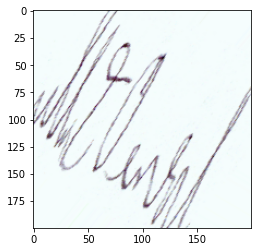

In [9]:
plt.imshow(train_generator[0][0][5])
print("Label : ",train_generator[0][1][5])

Label :  0.0


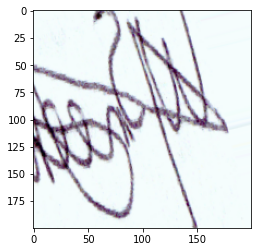

In [10]:
plt.imshow(train_generator[0][0][60])
print("Label : ",train_generator[0][1][60])

In [11]:
class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()
    
    self.cnn1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(3,200,200))
    self.cnn2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')
    self.cnn3 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')
    
    self.flatten = tf.keras.layers.Flatten()
    
    self.dense1 = tf.keras.layers.Dense(512, activation='relu')
    self.dense2 = tf.keras.layers.Dense(1, activation='sigmoid')

  def call(self, inputs):
    
    x = self.cnn1(inputs)
    x = self.cnn2(x)
    x = self.cnn3(x)
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    
    return x

model = MyModel()

In [12]:
input_shape = (None, 200, 200, 3)
model.build(input_shape)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  448       
                                                                 
 conv2d_1 (Conv2D)           multiple                  4640      
                                                                 
 conv2d_2 (Conv2D)           multiple                  4624      
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  308314624 
                                                                 
 dense_1 (Dense)             multiple                  513       
                                                                 
Total params: 308,324,849
Trainable params: 308,324,849
No

In [13]:
model.compile(
    loss="binary_crossentropy",
    
    optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),

    metrics=["acc"])

c:\Users\mapan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [14]:
history = model.fit_generator(

    train_generator,

    steps_per_epoch=train_generator.samples//train_generator.batch_size,

    epochs=40,

    verbose=2)

C:\Users\mapan\AppData\Local\Temp\ipykernel_21280\646808504.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/40


: 

: 

In [ ]:
acc = history.history["acc"]

loss = history.history["loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Eğitim başarımı")

plt.title("Eğitim başarımı")

plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Eğitim kaybı")

plt.title("Eğitim kaybı")

plt.legend()

plt.show()

In [ ]:
model.evaluate(test_generator)

In [ ]:
plt.imshow(test_generator[0][0][5])
print("Label : ",test_generator[0][1][5])

test_input = test_generator[0][0][5]
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)

pred = model.predict(test_input)

if pred>=0.5:
    pred = 1
    
else:
    
    pred = 0
    
print("Predict : ",float(pred))

In [ ]:
plt.imshow(test_generator[0][0][30])
print("Label : ",test_generator[0][1][30])

test_input = test_generator[0][0][30]
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)

pred = model.predict(test_input)

if pred>=0.5:
    pred = 1
    
else:
    
    pred = 0
    
print("Predict : ",float(pred))